In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob, pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-l3a1p32q because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='../analysis_run3/AN_Note_Plot'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [3]:
# file = uproot.open("data/GenInfo_only_90.root")
file_m3p7 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M3p7_combined.root")
file_m4 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M4_combined.root")
file_m5 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M5_combined.root")
file_m6 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M6_combined.root")
file_m8 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M8_combined.root")
file_m10 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M10_combined.root")
file_m12 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M12_combined.root")
file_m14 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M14_combined.root")

RHTree_m3p7 = file_m3p7["fevt/RHTree"]
RHTree_m4 = file_m4["fevt/RHTree"]
RHTree_m5 = file_m5["fevt/RHTree"]
RHTree_m6 = file_m6["fevt/RHTree"]
RHTree_m8 = file_m8["fevt/RHTree"]
RHTree_m10 = file_m10["fevt/RHTree"]
RHTree_m12 = file_m12["fevt/RHTree"]
RHTree_m14 = file_m14["fevt/RHTree"]
signal_mass = ['3.7', '4', '5', '6', '8', '10', '12', '14']
label_mass  = ['3p7','4', '5', '6', '8', '10', '12', '14']
RHTree_list = [RHTree_m3p7]#,RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8,RHTree_m10, RHTree_m12, RHTree_m14]

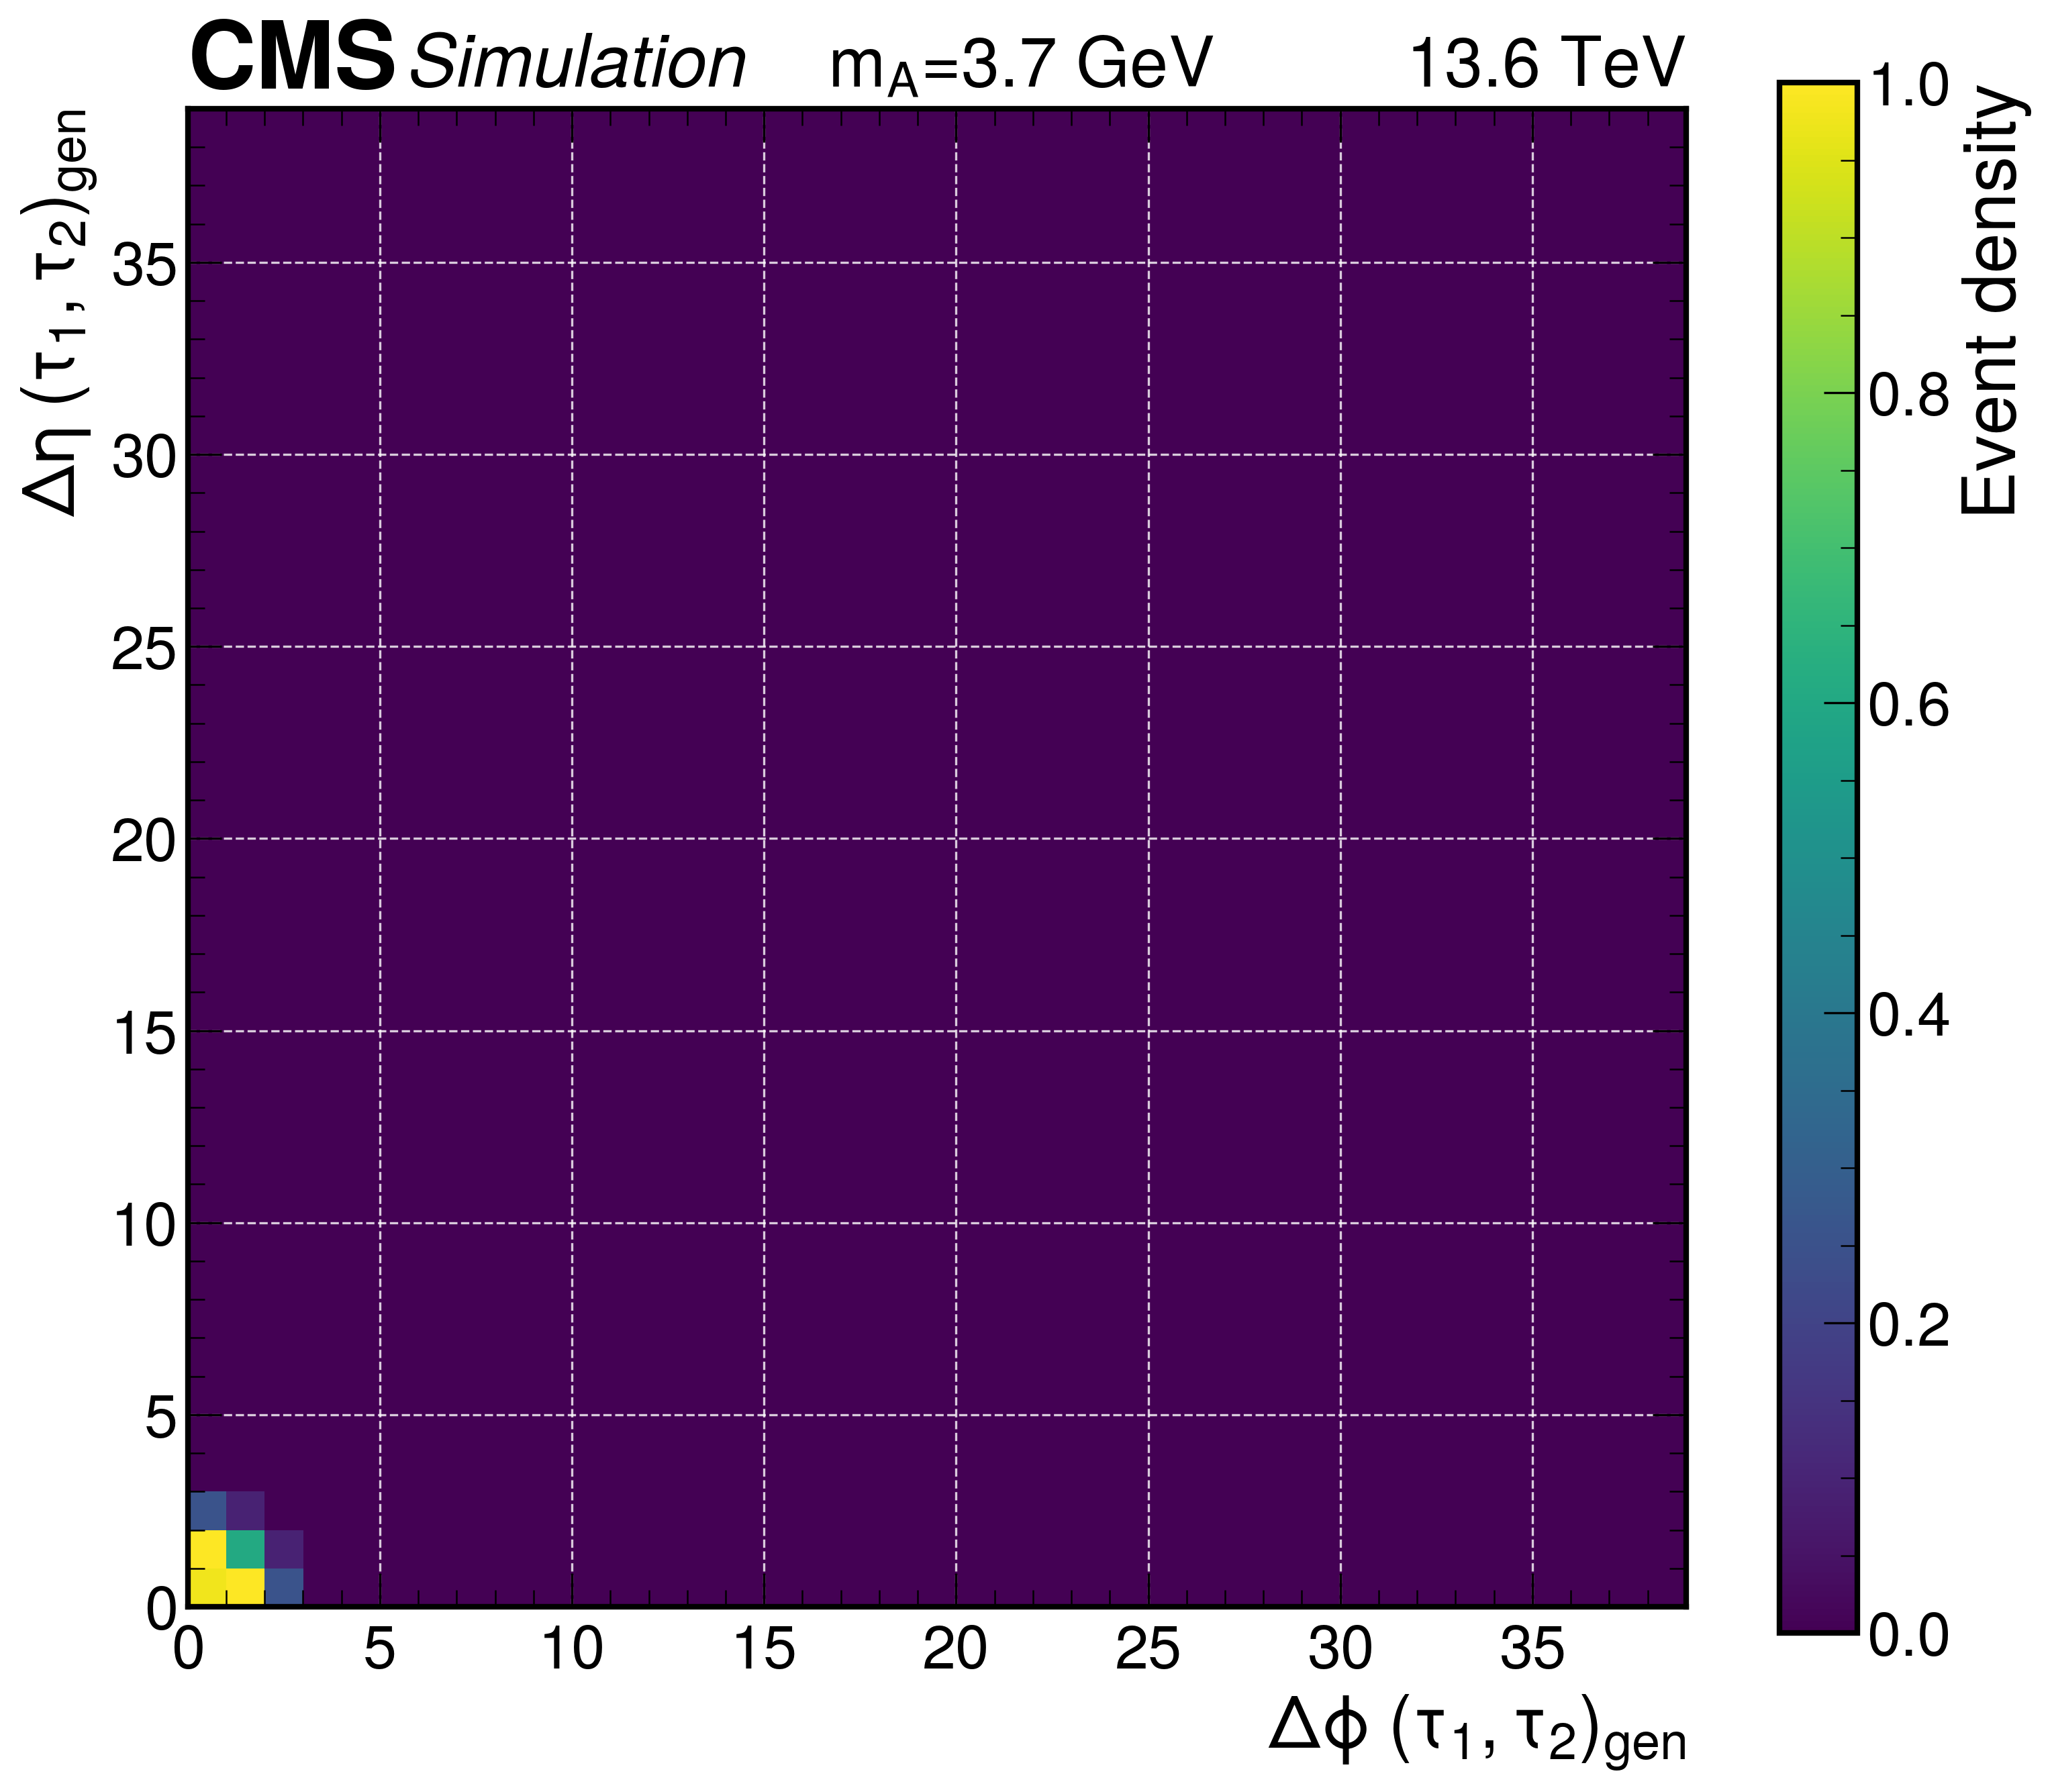

In [14]:
for i, RHTree in enumerate(RHTree_list):
    Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
    Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
    eta= Tau1_Tau2_deta
    phi= Tau1_Tau2_dphi
    bins = np.arange(0,40,1)
    fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
    crystal_eta = eta / 0.0174
    crystal_phi = phi / 0.0174
    H, xedges, yedges = np.histogram2d(crystal_eta, crystal_phi, bins =[bins, bins], density = True)
    H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(H_normalized, extent=extent, interpolation='none',origin ='lower')
    plt.colorbar(im, ax=ax, label='Event density')
    # plt.xticks(np.arange(0,30,1),size=12)
    # plt.yticks(np.arange(0,30,1),size=12)
    plt.ylabel(r"$\Delta \eta\; (\tau_1,\tau_2)_{gen}$")
    plt.xlabel(r"$\Delta \phi\; (\tau_1,\tau_2)_{gen}$")
    plt.grid(color='white', linestyle='--')
    hep.cms.label(llabel=f"Simulation ", rlabel=f"   $m_A$={signal_mass[i]} GeV          13.6 TeV", loc=0, ax=ax)
    # plt.savefig(f'{out_dir}/dphi_deta_signal_mass_{label_mass[i]}.pdf',  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()

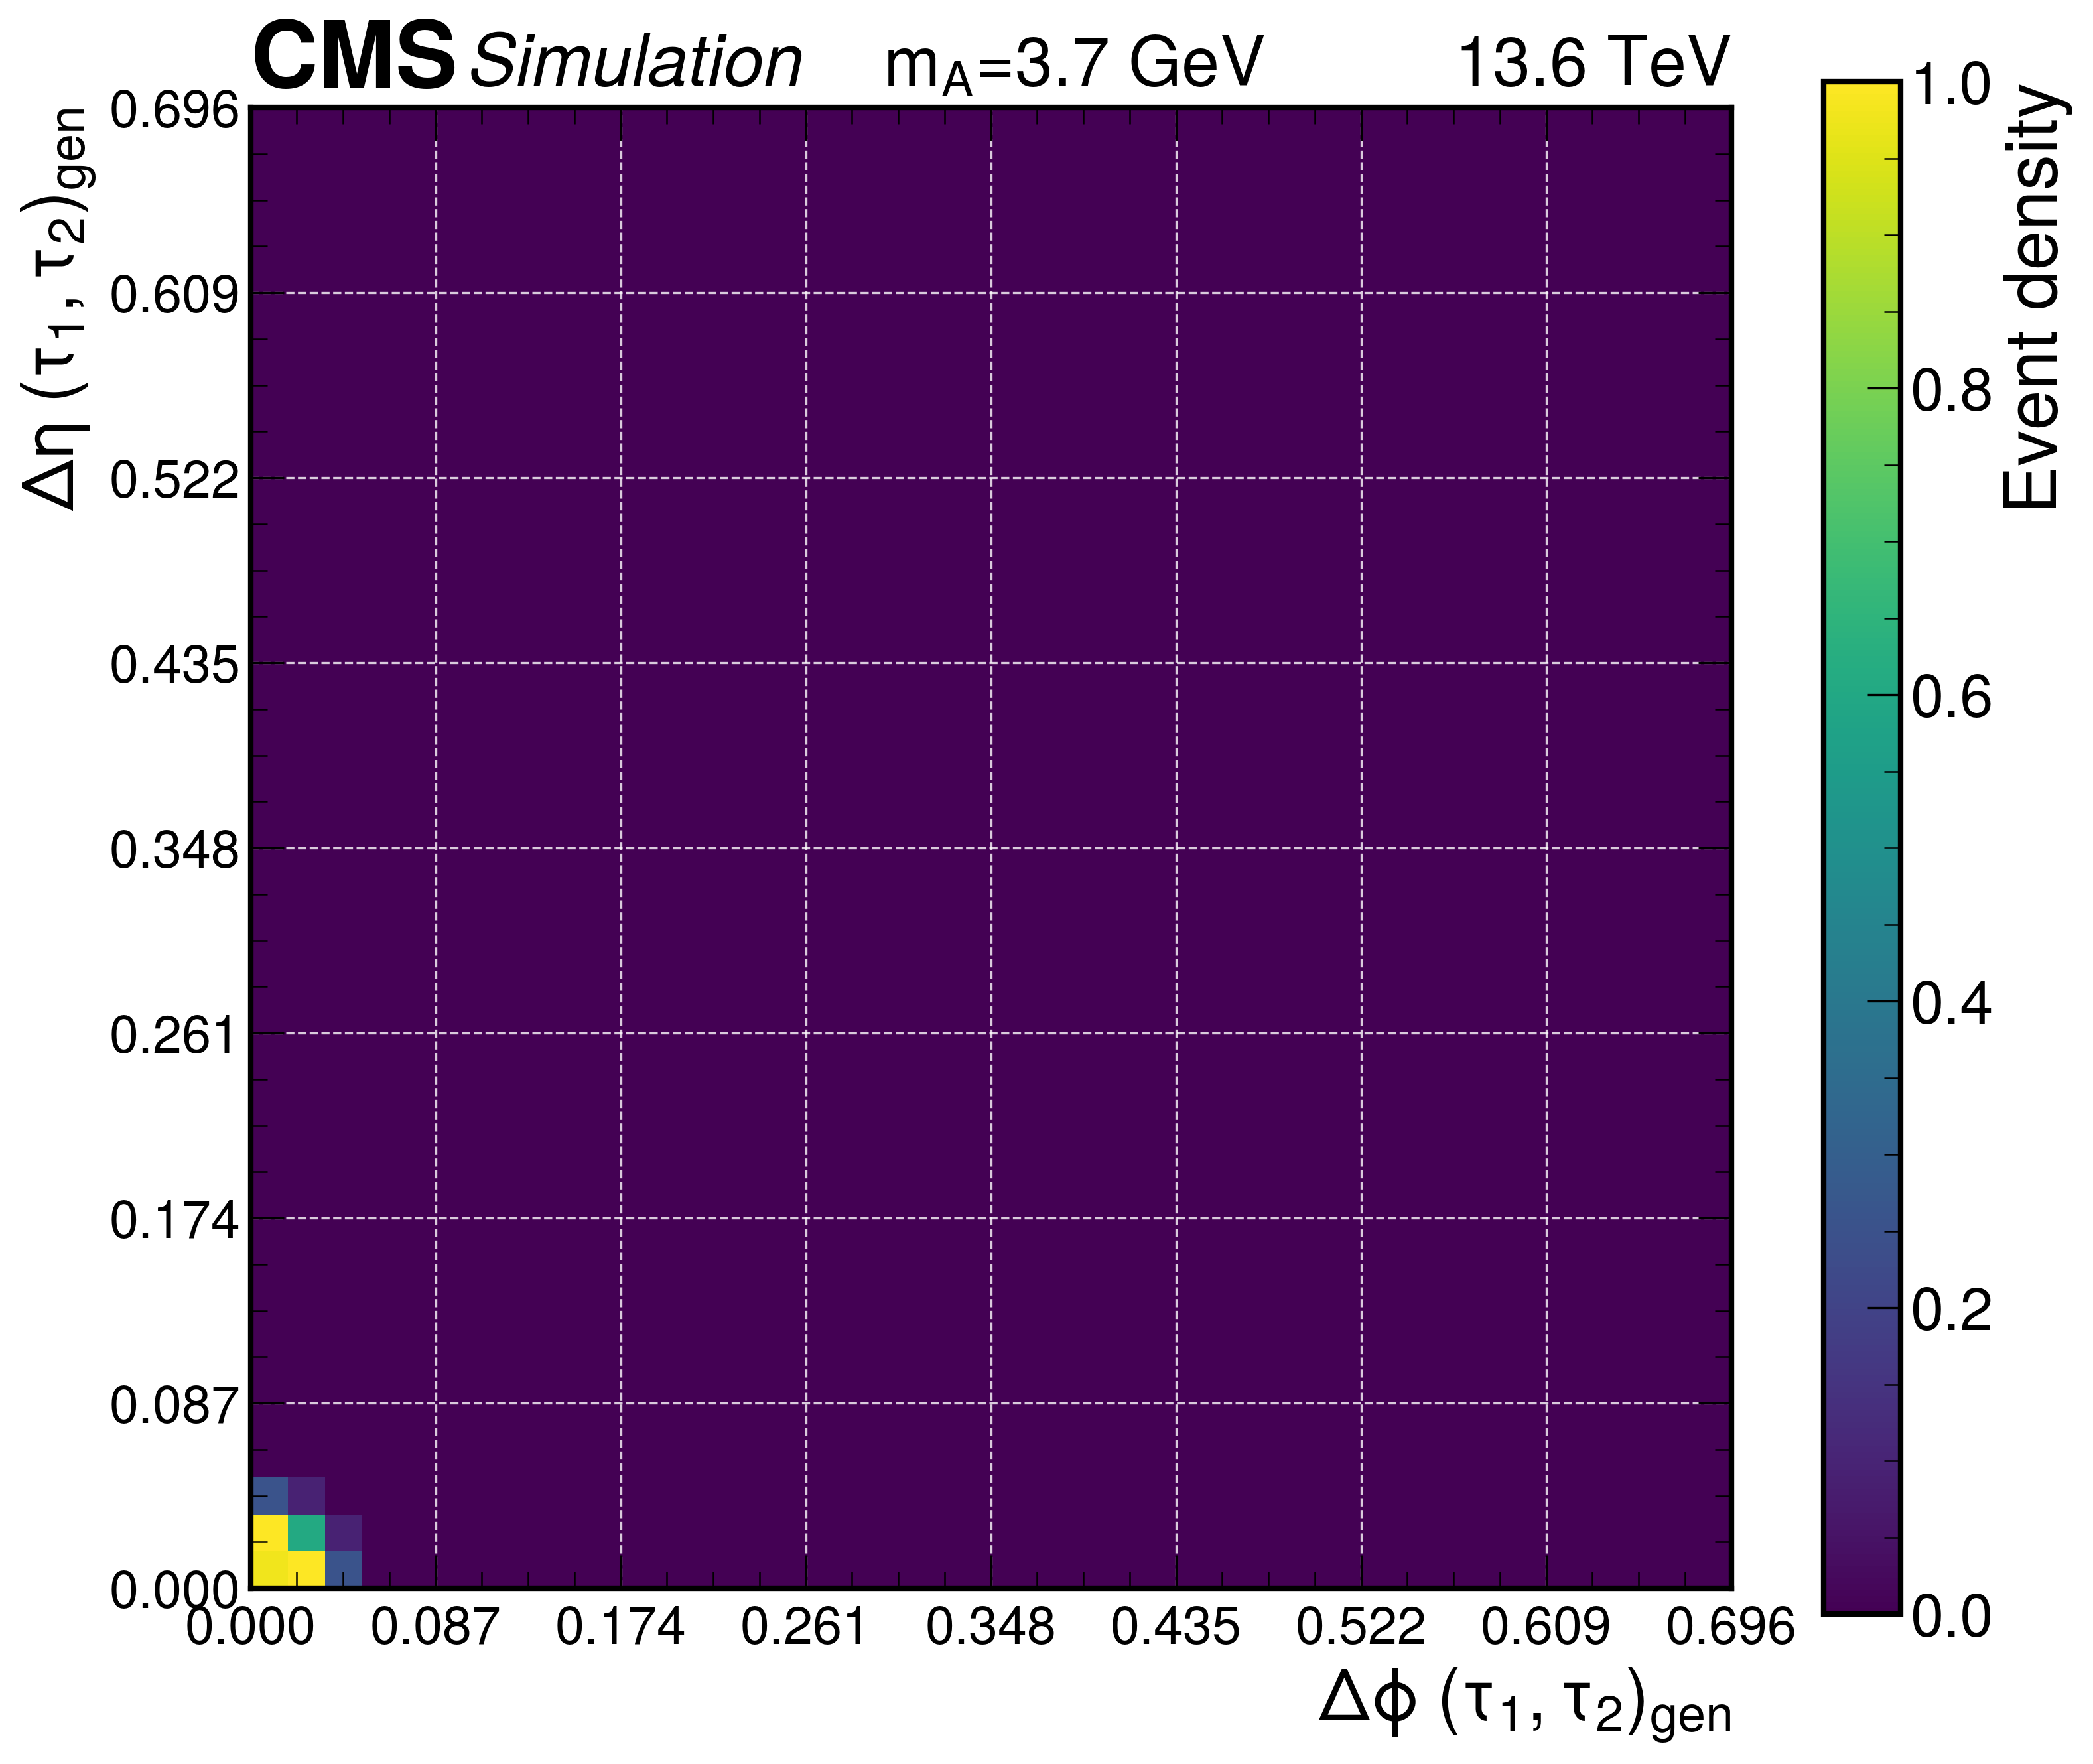

In [11]:
for i, RHTree in enumerate(RHTree_list):
    Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
    Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
    eta= Tau1_Tau2_deta
    phi= Tau1_Tau2_dphi
    bins = np.arange(0,41*0.0174,0.0174)
    fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
    crystal_eta = eta 
    crystal_phi = phi 
    H, xedges, yedges = np.histogram2d(crystal_eta, crystal_phi, bins =[bins, bins], density = True)
    H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(H_normalized, extent=extent, interpolation='none',origin ='lower')
    plt.colorbar(im, ax=ax, label='Event density')
    plt.xticks(np.arange(0,0.8699-0.087,0.087),size=19)
    plt.yticks(np.arange(0,0.8699-0.087,0.087),size=19)
    plt.ylabel(r"$\Delta \eta\; (\tau_1,\tau_2)_{gen}$")
    plt.xlabel(r"$\Delta \phi\; (\tau_1,\tau_2)_{gen}$")
    plt.grid(color='white', linestyle='--')
    hep.cms.label(llabel=f"Simulation ", rlabel=f"   $m_A$={signal_mass[i]} GeV          13.6 TeV", loc=0, ax=ax)
    plt.savefig(f'{out_dir}/dphi_deta_signal_mass_ecal_hcal_granularity_{label_mass[i]}.pdf',  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()

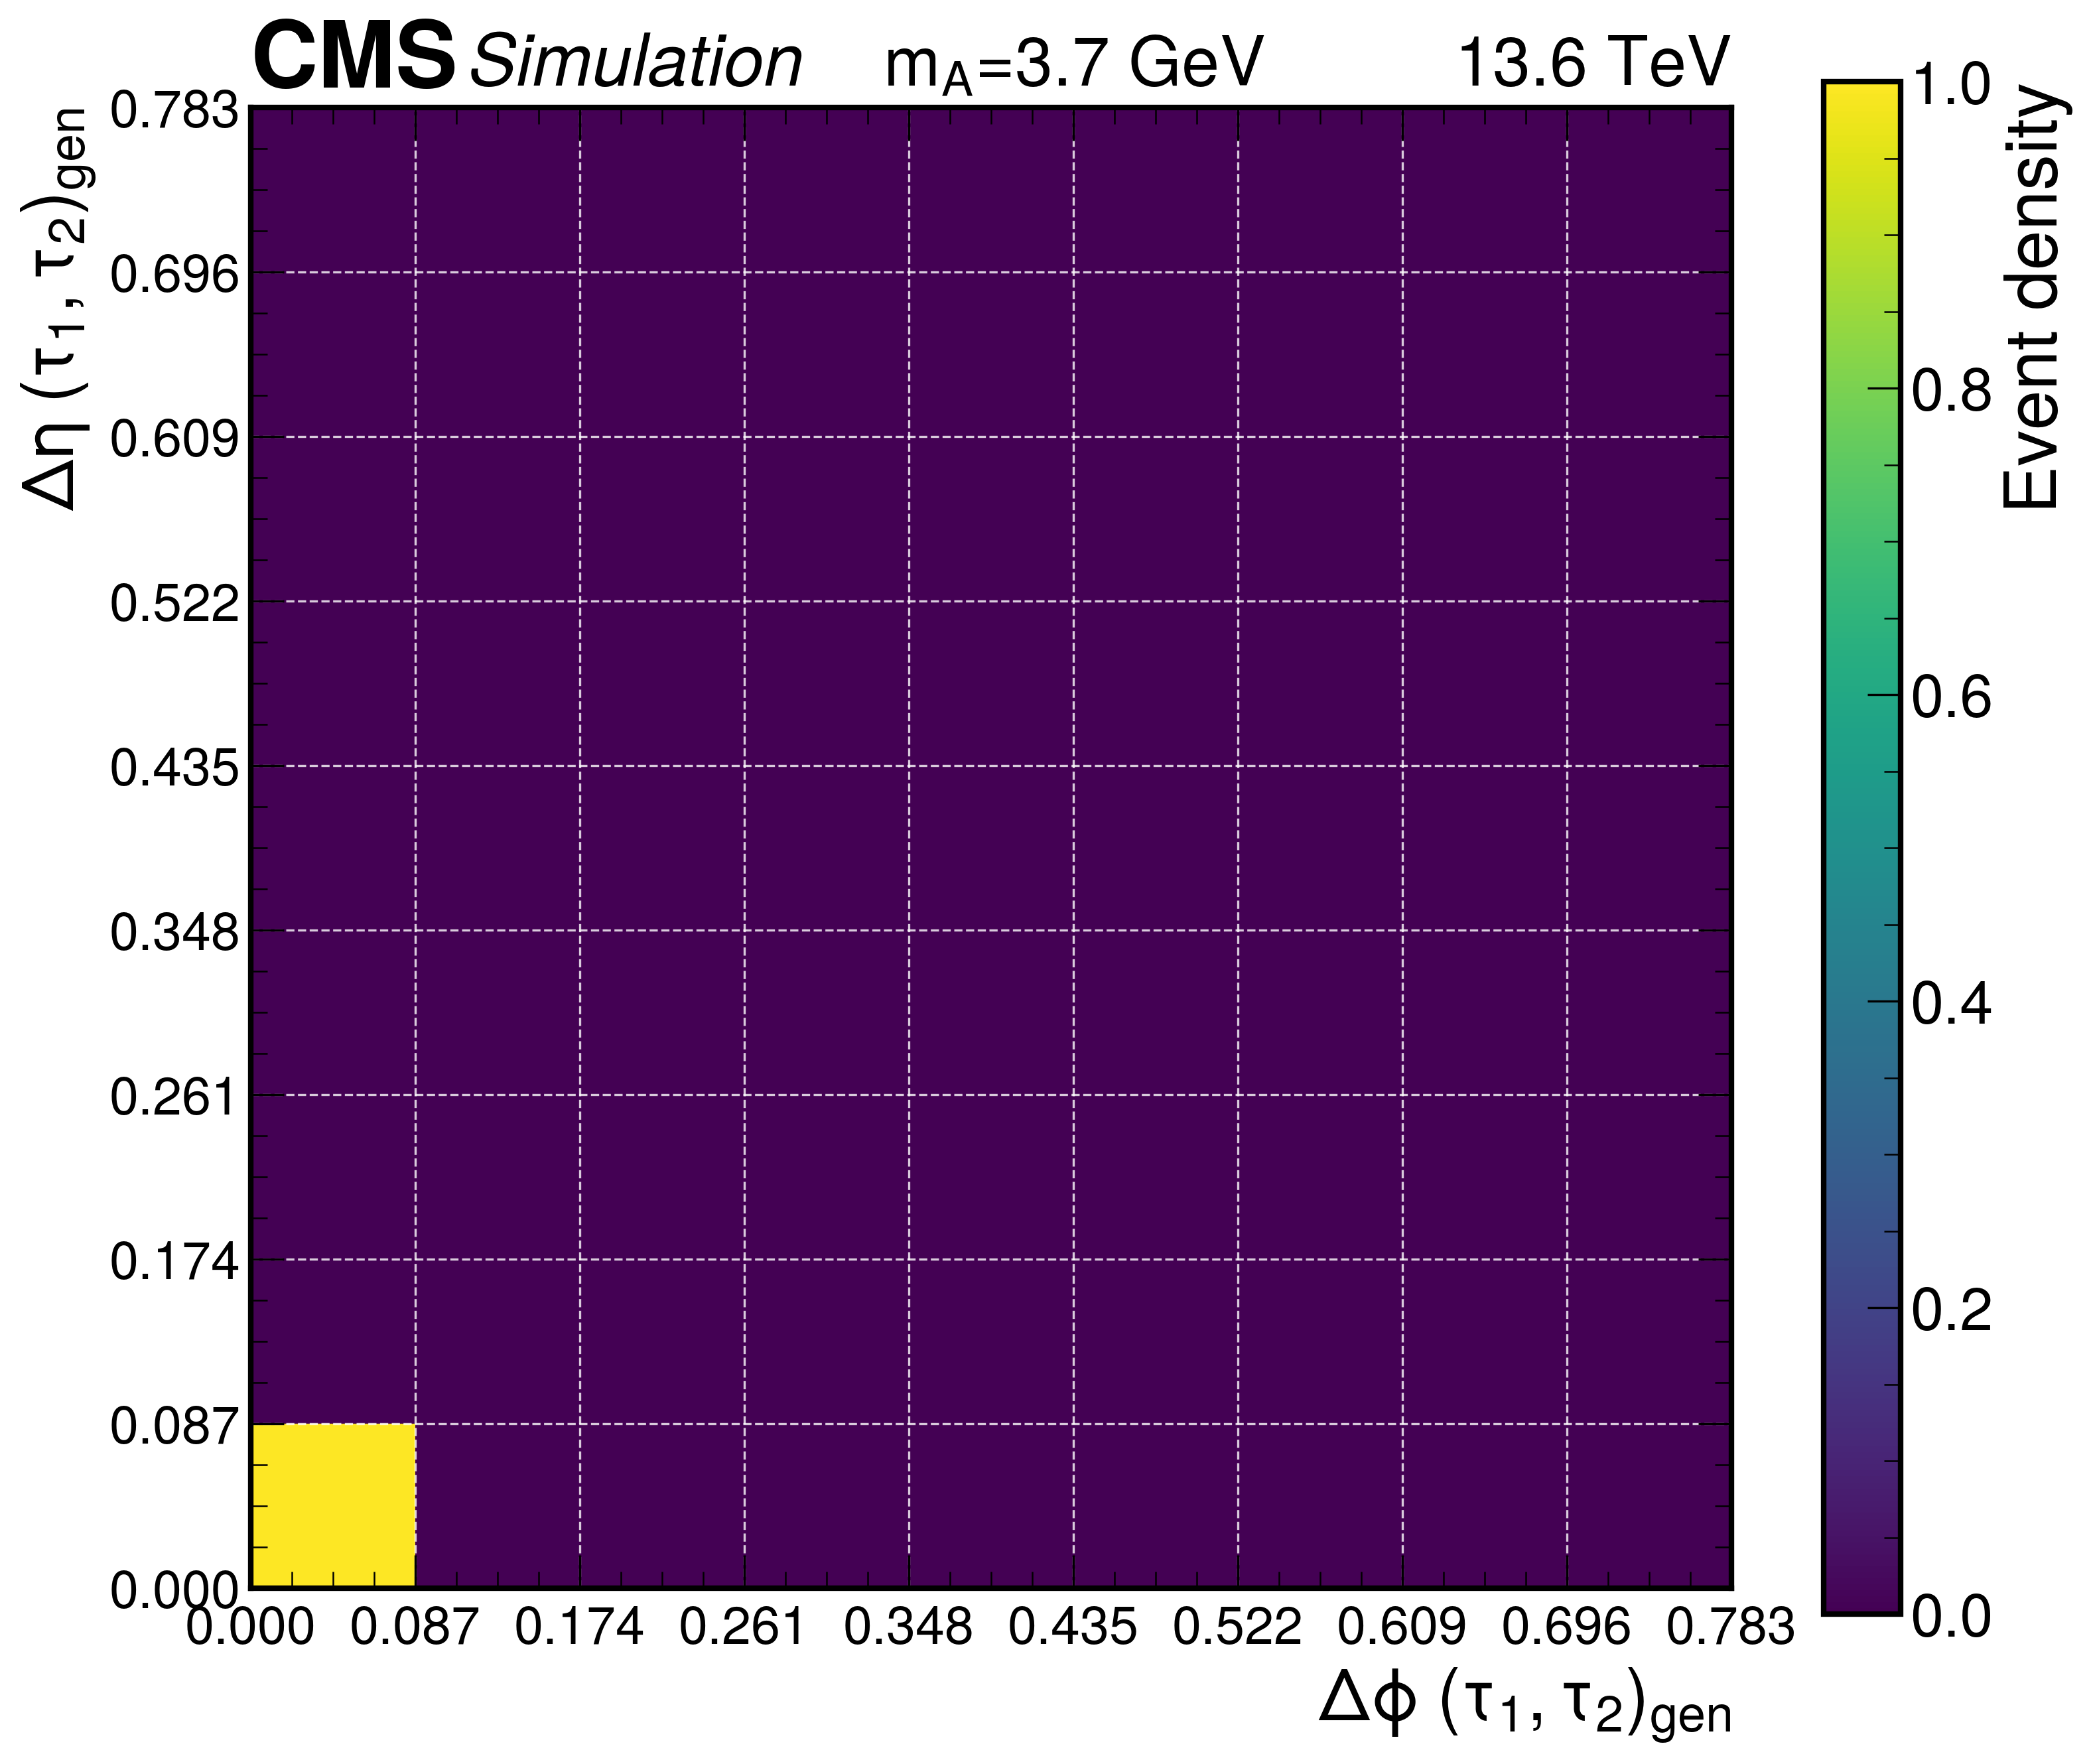

In [10]:
for i, RHTree in enumerate(RHTree_list):
    Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
    Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
    eta= Tau1_Tau2_deta
    phi= Tau1_Tau2_dphi
    bins = np.arange(0,0.87,0.087)
    fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
    # crystal_eta = eta / 0.0174
    # crystal_phi = phi / 0.0174
    crystal_eta = eta
    crystal_phi = phi
    H, xedges, yedges = np.histogram2d(crystal_eta, crystal_phi, bins =[bins, bins], density = True)
    H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(H_normalized, extent=extent, interpolation='none',origin ='lower')
    plt.colorbar(im, ax=ax, label='Event density')
    plt.xticks(bins,size=19)
    plt.yticks(bins,size=19)
    plt.ylabel(r"$\Delta \eta\; (\tau_1,\tau_2)_{gen}$")
    plt.xlabel(r"$\Delta \phi\; (\tau_1,\tau_2)_{gen}$")
    plt.grid(color='white', linestyle='--')
    hep.cms.label(llabel=f"Simulation ", rlabel=f"   $m_A$={signal_mass[i]} GeV          13.6 TeV", loc=0, ax=ax)
    # plt.savefig(f'{out_dir}/dphi_deta_signal_mass_hcal_granaluraty_{label_mass[i]}.pdf',  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()

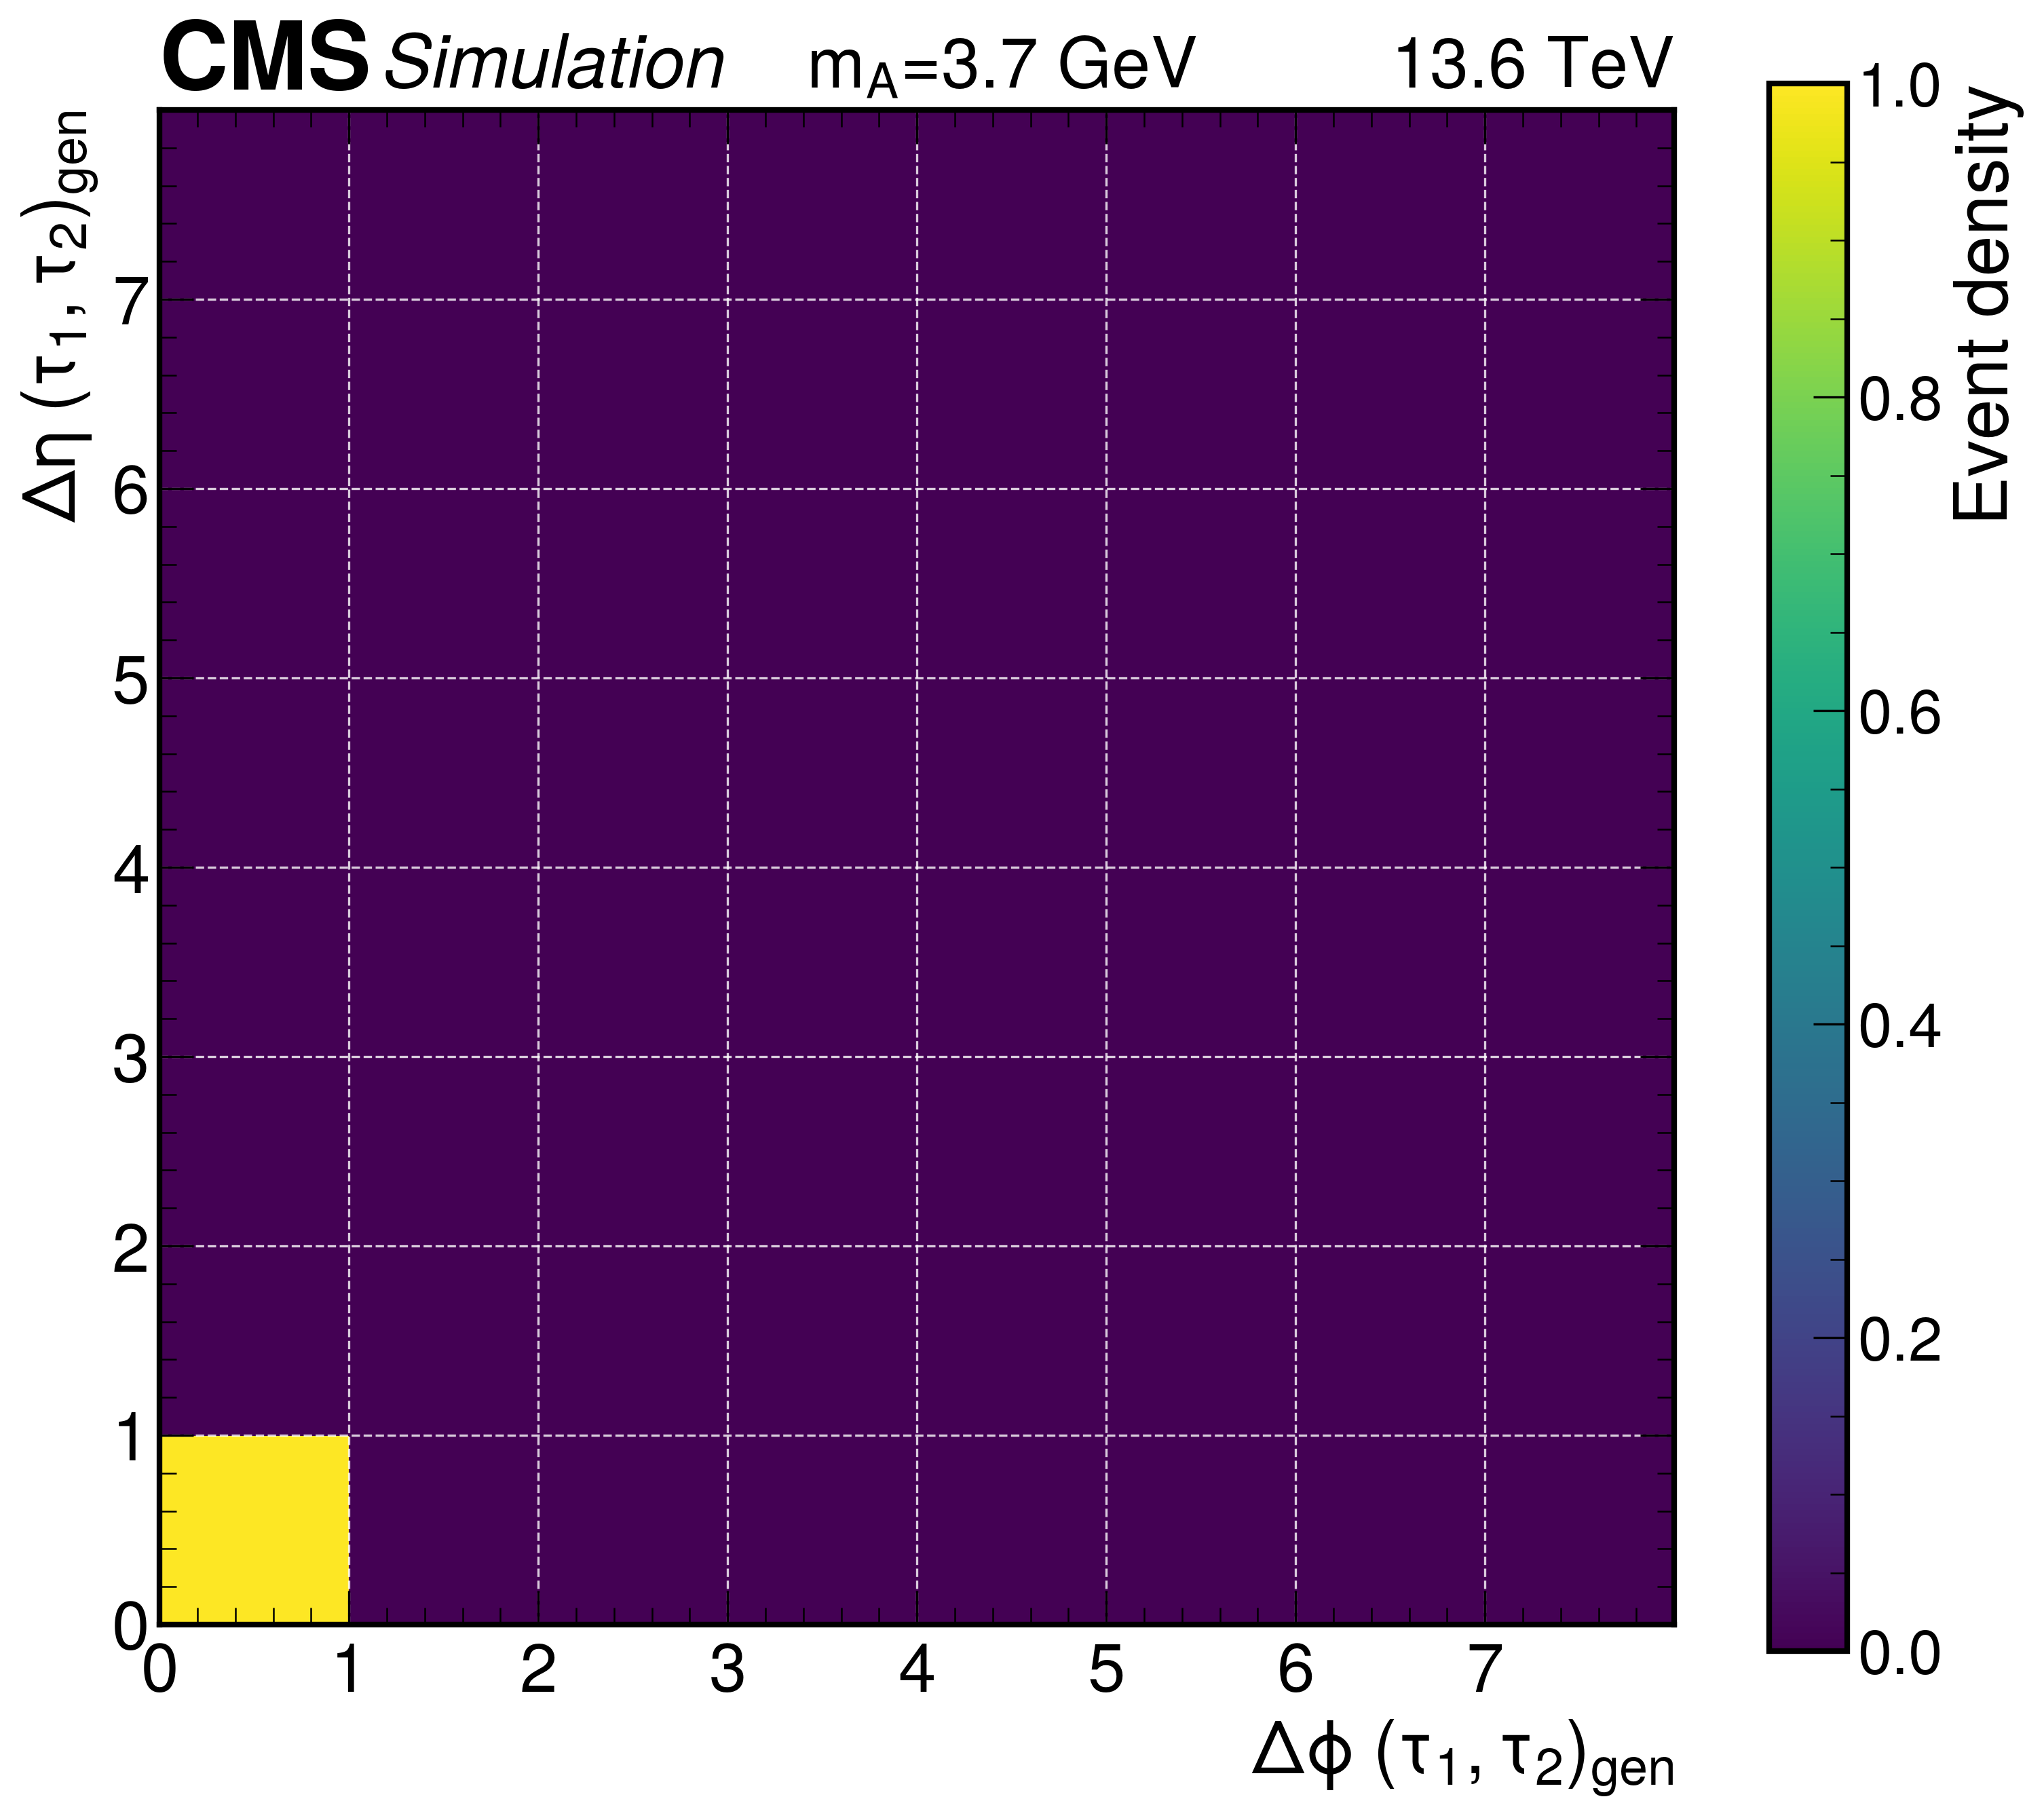

In [13]:
for i, RHTree in enumerate(RHTree_list):
    Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
    Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
    eta= Tau1_Tau2_deta
    phi= Tau1_Tau2_dphi
    bins = np.arange(0,9,1)
    fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
    crystal_eta = eta / 0.084
    crystal_phi = phi / 0.084
    H, xedges, yedges = np.histogram2d(crystal_eta, crystal_phi, bins =[bins, bins], density = True)
    H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(H_normalized, extent=extent, interpolation='none',origin ='lower')
    plt.colorbar(im, ax=ax, label='Event density')
    plt.xticks(np.arange(0,8,1),size=24)
    plt.yticks(np.arange(0,8,1),size=24)
    plt.ylabel(r"$\Delta \eta\; (\tau_1,\tau_2)_{gen}$")
    plt.xlabel(r"$\Delta \phi\; (\tau_1,\tau_2)_{gen}$")
    plt.grid(color='white', linestyle='--')
    hep.cms.label(llabel=f"Simulation ", rlabel=f"   $m_A$={signal_mass[i]} GeV          13.6 TeV", loc=0, ax=ax)
    # plt.savefig(f'{out_dir}/dphi_deta_signal_mass_hcal_tower_{label_mass[i]}.pdf',  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()

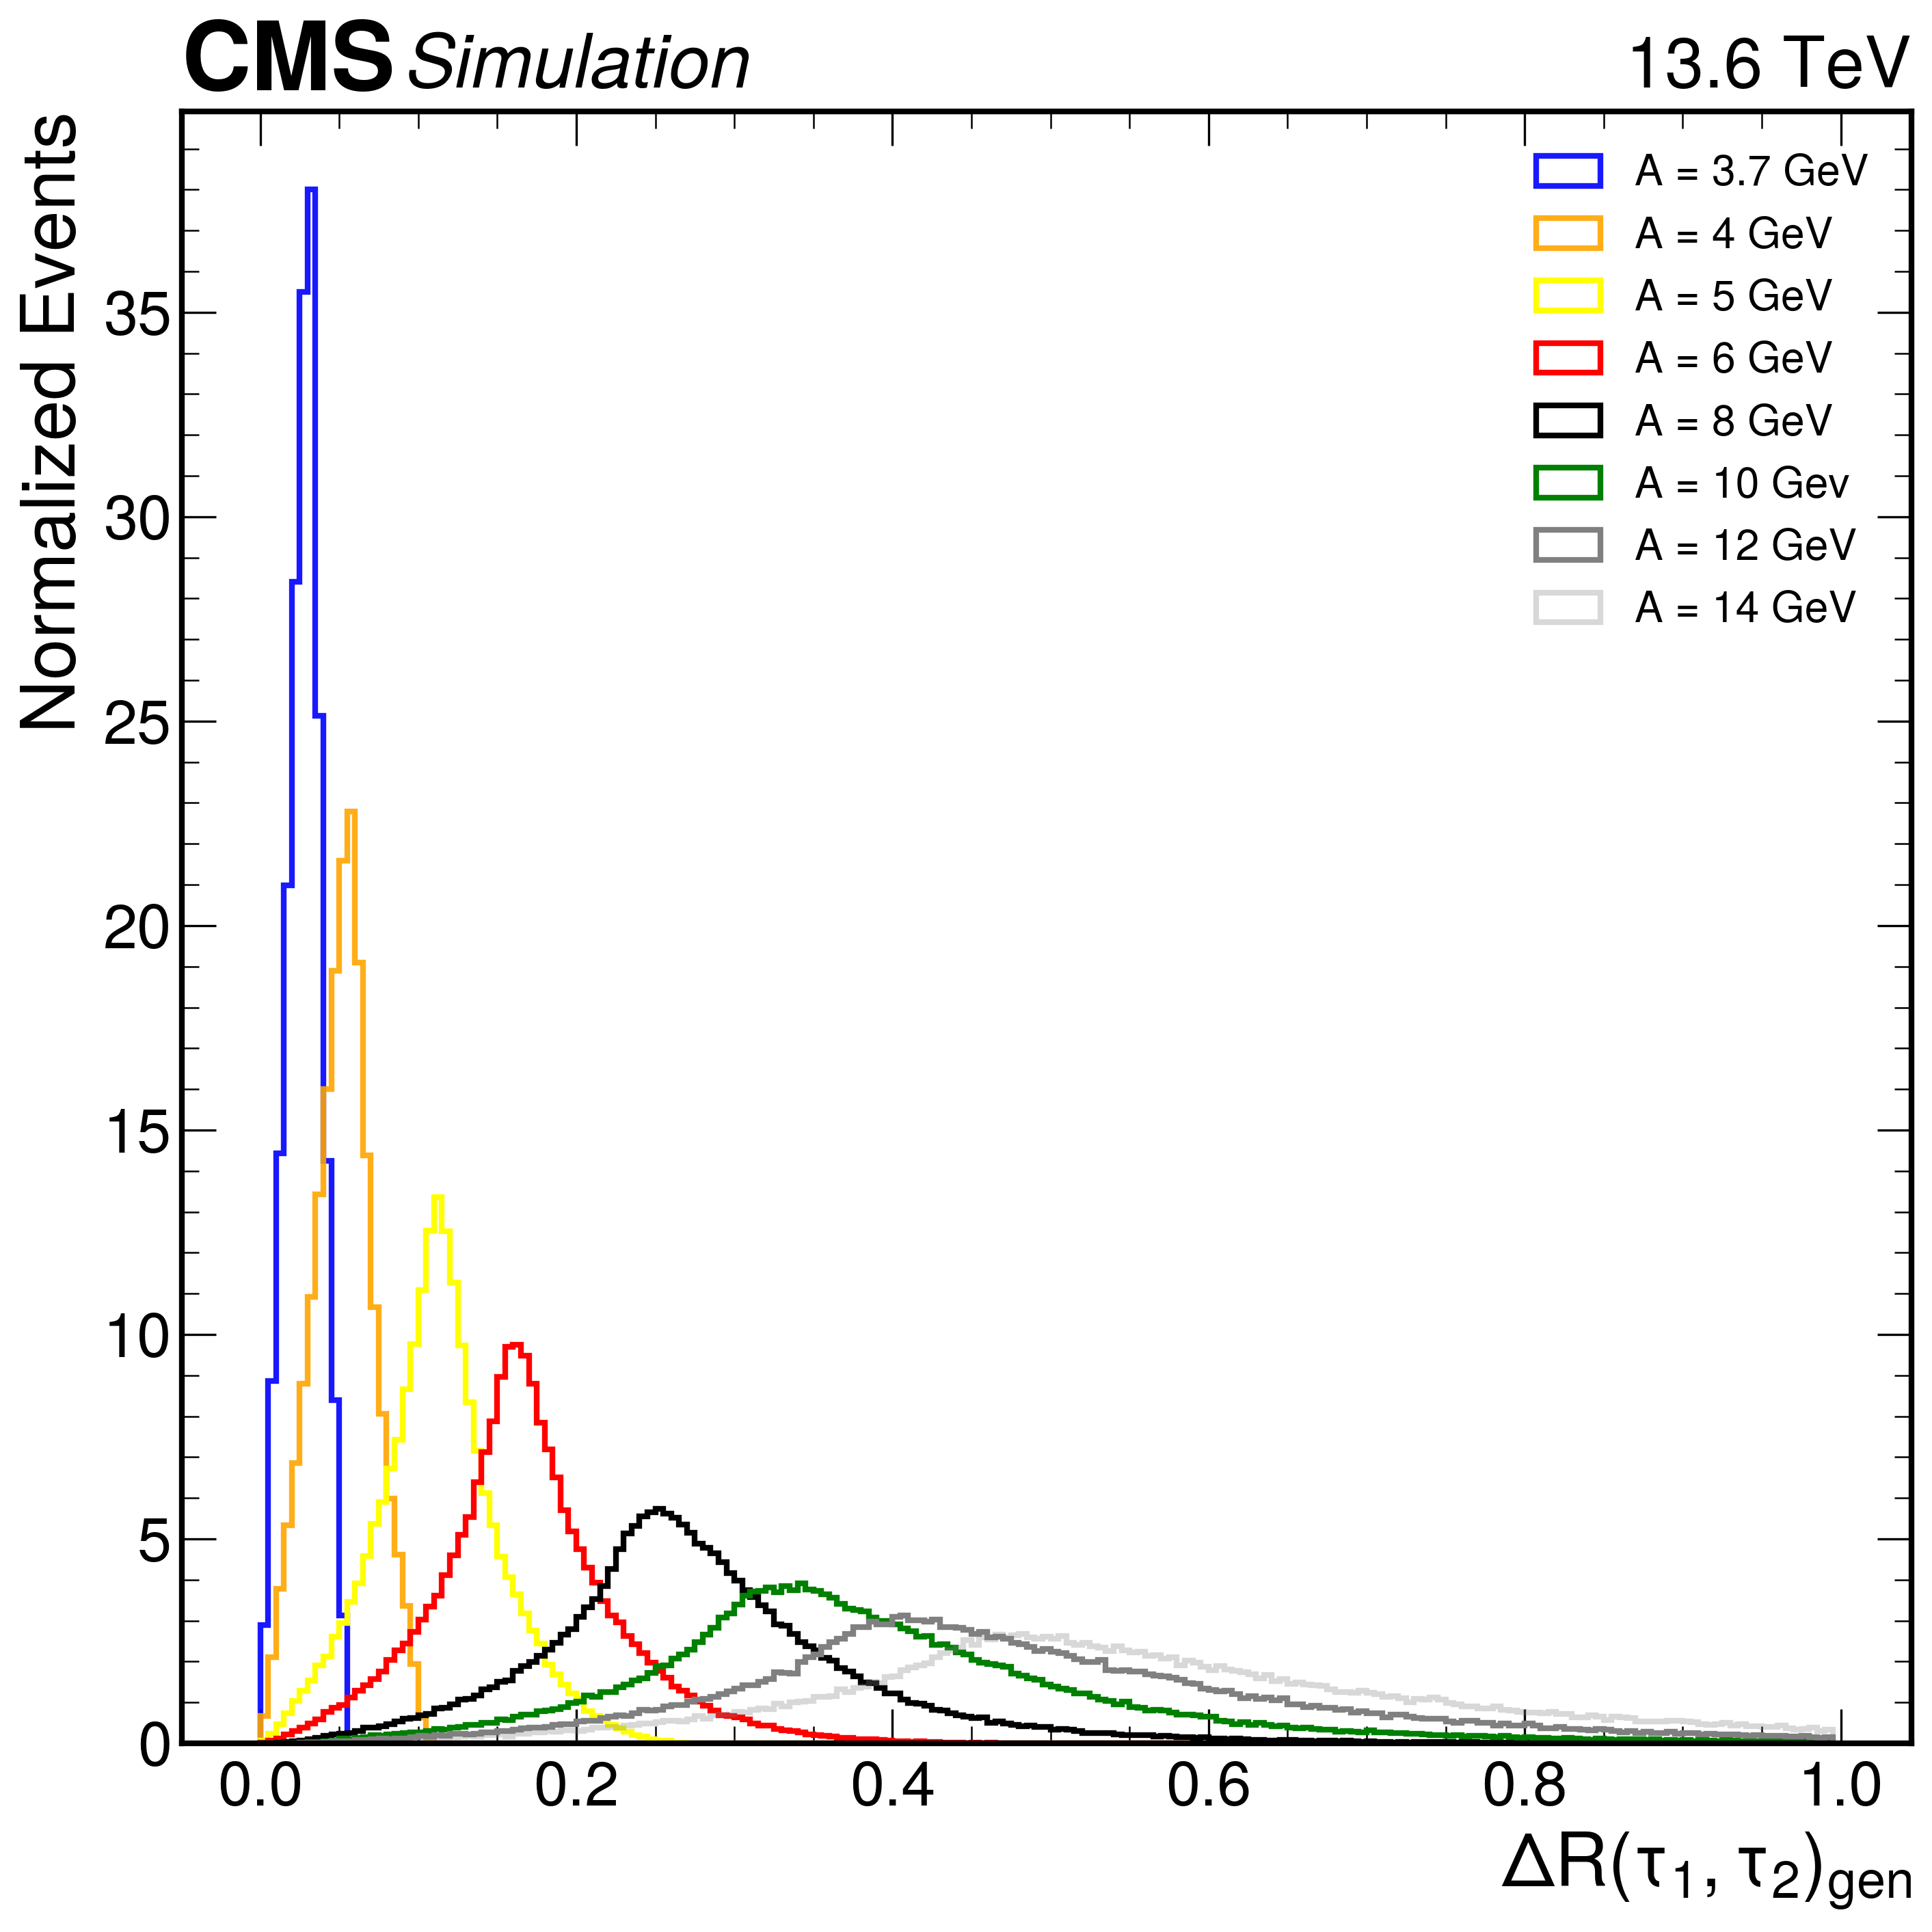

In [17]:
dR_Tau1_Tau23p7 = RHTree_m3p7.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau24 = RHTree_m4.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau25 = RHTree_m5.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau26 = RHTree_m6.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau28 = RHTree_m8.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau210 = RHTree_m10.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau212 = RHTree_m12.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau214 = RHTree_m14.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

a, b, bin_size=0, 1, 0.005
density= True
fig, ax = plt.subplots(dpi=300)
plt.hist(dR_Tau1_Tau23p7,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2, color='b',alpha=0.9,label="A = 3.7 GeV", density = density)
plt.hist(dR_Tau1_Tau24,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2, color='orange',alpha=0.9, label="A = 4 GeV",density = density)
plt.hist(dR_Tau1_Tau25,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2,color='yellow',label="A = 5 GeV",density = density)
plt.hist(dR_Tau1_Tau26,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2,color='r',label="A = 6 GeV",density = density)
plt.hist(dR_Tau1_Tau28,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2,color='black',label="A = 8 GeV",density = density)
plt.hist(dR_Tau1_Tau210,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2,color='g',label="A = 10 Gev",density = density)
plt.hist(dR_Tau1_Tau212,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2,color='grey',label="A = 12 GeV",density = density)
plt.hist(dR_Tau1_Tau214,bins=np.arange(a,b,bin_size),histtype='step',linestyle='-',linewidth=2,color='grey',alpha=0.3,label="A = 14 GeV",density = density)

# plt.xscale('log')
# plt.yscale('log')
# ax.legend(
#     loc='upper left',
#     bbox_to_anchor=(1, 1),
#     borderaxespad=0.,
#     fontsize=10
# )
plt.legend(loc='best', fontsize=15)
plt.ylabel("Events")
if density: plt.ylabel("Normalized Events")
# plt.xlabel(r"gen $\Delta R_{\tau\tau}$")
plt.xlabel(r"$\Delta R (\tau_1,\tau_2)_{gen}$")
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
# if save: plt.savefig('%s/gen_dR_Tau1_Tau2_hist_all_signal.jpeg'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()